In [2]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from scipy import stats
from scipy.stats import randint, uniform

pd.options.display.float_format = '{:.2f}'.format

## IMPORT & EXPLORE

In [3]:
krisha_almaty_rental = pd.read_csv(r"C:\Users\User\Desktop\DATA SCIENCE\Github\krisha_bot\data\original_source\krisha_almaty_rental.csv.gz")

# add more data 

krisha_almaty_rental_ext = pd.read_csv(r"C:\Users\User\Downloads\almaty_apartments_clustered.csv")


In [4]:
krisha_almaty_rental.sample(5)

,id,floor,total_floors,area_sqm,rooms,bathroom,full_address,furniture,parking,security,price,url,full_address_code,furniture_code,parking_code,security_code,bathroom_code
1700,761067685,3,13,40.00,1,совмещен,"Алматы, Жетысуский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,260000,https://krisha.kz/a/show/761067685,5,18,1,32,5
4950,680897239,1,9,36.30,1,совмещен,"Алматы, Алмалинский р-н\r\nпоказать на карте",неизвестно,неизвестно,неизвестно,250000,https://krisha.kz/a/show/680897239,2,34,1,32,5
4956,1000653132,3,6,40.00,1,совмещен,"Алматы, Алатауский р-н\r\nпоказать на карте","обеденный стол, шкаф для одежды, кухонный гарн...",неизвестно,неизвестно,195000,https://krisha.kz/a/show/1000653132,1,46,1,32,5
595,1000510711,1,7,71.00,3,совмещен,"Алматы, Алатауский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,неизвестно,300000,https://krisha.kz/a/show/1000510711,1,18,1,32,5
2207,677974310,8,21,107.00,3,"разделен, совмещен","Алматы, Бостандыкский р-н\r\nпоказать на карте","кровать, обеденный стол, шкаф для одежды, кухо...",неизвестно,"охрана, домофон, консьерж",500000,https://krisha.kz/a/show/677974310,4,18,1,58,3


In [5]:
krisha_almaty_rental_ext.sample(5)

,floor,total_floors,area_sqm,rooms,price,full_address_code,furniture_code,parking_code,security_code,bathroom_code,contact_name,title,url,id,cluster
7505,1.00,4.00,30.00,1,200000,3,16.00,1,32.00,5,Хозяин недвижимости,"1-комнатная квартира · 30 м² · 1/4 этаж, мкр №...",https://krisha.kz/a/show/760892049?srchid=0196...,760892049,18
6341,2.00,2.00,24.00,1,120000,7,34.00,1,32.00,5,Хозяин недвижимости,1-комнатная квартира · 24 м² · 2/2 этаж · поме...,https://krisha.kz/a/show/761915397?srchid=0196...,761915397,3
14671,3.00,5.00,34.00,1,210000,2,18.00,3,42.00,5,Хозяин недвижимости,"1-комнатная квартира · 34 м² · 3/5 этаж, мкр Т...",https://krisha.kz/a/show/676737999?srchid=0196...,676737999,7
5085,8.00,10.00,165.00,3,350000,2,34.00,1,32.00,1,Саранжиева Гульсим,3-комнатная квартира · 165 м² · 8/10 этаж · по...,https://krisha.kz/a/show/1001100374?srchid=019...,1001100374,10
15759,2.00,5.00,55.50,3,350000,2,18.00,1,32.00,2,Хозяин недвижимости,"3-комнатная квартира · 55.5 м² · 2/5 этаж, Жам...",https://krisha.kz/a/show/1001577740?srchid=019...,1001577740,2


## CLEAN & PREPARE

In [4]:
clustering_features = ['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
                       'full_address_code', 'furniture_code', 'parking_code', 'security_code',
                       'bathroom_code']

In [5]:
krisha_almaty_rental_ext = pd.concat( [krisha_almaty_rental_ext,krisha_almaty_rental] )

In [6]:
krisha_almaty_rental_ext = krisha_almaty_rental_ext.drop_duplicates()


## MODEL BUILD

In [14]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

krisha_almaty_rental_ext_features = krisha_almaty_rental_ext[clustering_features]

In [8]:
krisha_almaty_rental_ext_features_sscaler = StandardScaler()


krisha_almaty_rental_ext_features_scaled = krisha_almaty_rental_ext_features_sscaler.fit_transform(krisha_almaty_rental_ext_features)

#### PCA

In [16]:

pca_results = []

X = krisha_almaty_rental_ext_features_scaled

for n in range(3, 10, 1):

    pca = PCA( n_components = n )
    pca.fit(X)

    cumulative_variance = np.sum(pca.explained_variance_ratio_)
    
    pca_results.append({
        'n_components': n,
        'cumulative_explained_variance': cumulative_variance
    })

In [17]:
pca_results

[{'n_components': 3, 'cumulative_explained_variance': 0.5454214336916213},
 {'n_components': 4, 'cumulative_explained_variance': 0.6475448794921778},
 {'n_components': 5, 'cumulative_explained_variance': 0.7456241887923235},
 {'n_components': 6, 'cumulative_explained_variance': 0.8390610962071423},
 {'n_components': 7, 'cumulative_explained_variance': 0.9150273895248947},
 {'n_components': 8, 'cumulative_explained_variance': 0.9518258198256228},
 {'n_components': 9, 'cumulative_explained_variance': 0.9824576817134983}]

#### CLUSTERING

In [21]:
kmeans_results = []

for k in range( 5,100,1 ):

    krisha_almaty_rental_kmeans_pipeline = Pipeline( [ ('scaler',StandardScaler()),
                                                       ( 'PCA', PCA( n_components = 7 )),
                                                       ('kmeans',KMeans( n_clusters = k, random_state=42 ))] )

    krisha_almaty_rental_kmeans_pipeline.fit(krisha_almaty_rental_ext_features)

    kmeans_results.append( {'K' : k,
                            'Inertia' : krisha_almaty_rental_kmeans_pipeline.named_steps['kmeans'].inertia_} )


Optimal number of clusters (elbow): K = 26


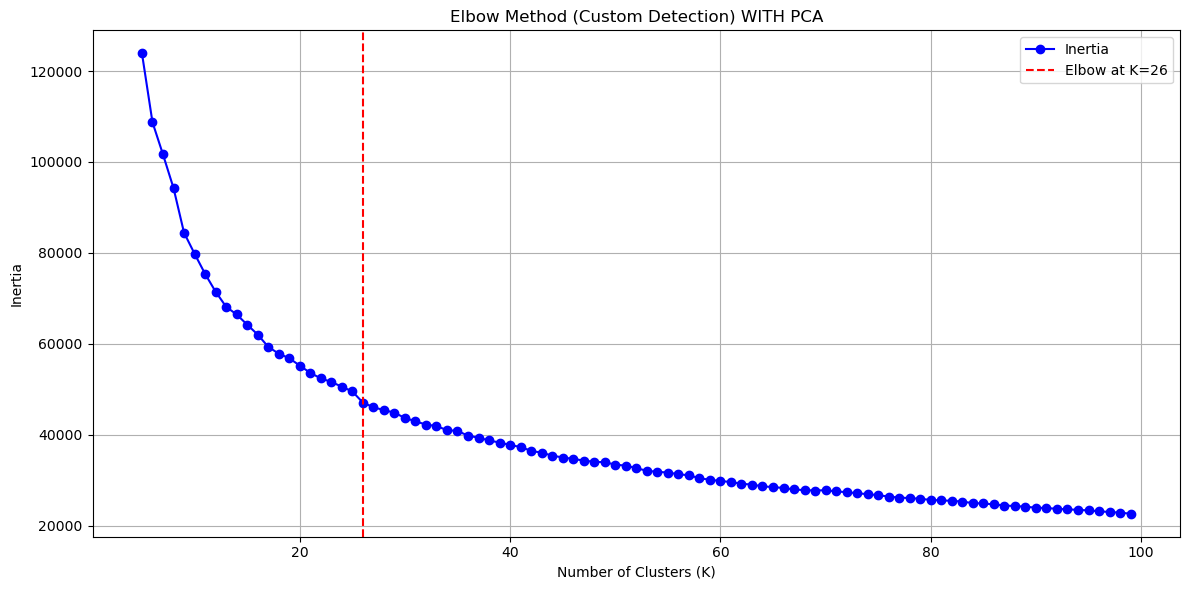

In [22]:
# Extract K values and inertia from your results
Ks = [res['K'] for res in kmeans_results]
inertias = [res['Inertia'] for res in kmeans_results]

# Custom elbow finder using max perpendicular distance to line
def find_elbow(k_values, inertia_values):
    p1 = np.array([k_values[0], inertia_values[0]])
    p2 = np.array([k_values[-1], inertia_values[-1]])
    
    distances = []
    for i in range(len(k_values)):
        p = np.array([k_values[i], inertia_values[i]])
        d = np.abs(np.cross(p2 - p1, p1 - p)) / np.linalg.norm(p2 - p1)
        distances.append(d)
        
    elbow_index = np.argmax(distances)
    return k_values[elbow_index]

# Find elbow K
elbow_k = find_elbow(Ks, inertias)
print(f"Optimal number of clusters (elbow): K = {elbow_k}")

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection) WITH PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the figure
plt.figure(figsize=(12, 6))
plt.plot(Ks, inertias, 'bo-', label='Inertia')
plt.axvline(x=elbow_k, color='r', linestyle='--', label=f'Elbow at K={elbow_k}')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method (Custom Detection) WITH PCA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_method_kmeans.png', dpi=300)
plt.close()


#### PIPELINE

In [24]:
krisha_almaty_rental_kmeans26_pipeline =  Pipeline( [ ('scaler',StandardScaler()),
                                                       ( 'PCA', PCA( n_components = 7 )),
                                                       ('kmeans',KMeans( n_clusters = 26, random_state=42 ))] )

krisha_almaty_rental_kmeans26_pipeline.fit(krisha_almaty_rental_ext_features)

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('kmeans', KMeans(n_clusters=26, random_state=42))])

In [25]:
krisha_almaty_rental_ext_features.columns

Index(['floor', 'total_floors', 'area_sqm', 'rooms', 'price',
       'full_address_code', 'furniture_code', 'parking_code', 'security_code',
       'bathroom_code'],
      dtype='object')

In [26]:
test_features_dict = {
    'floor': [3],
    'total_floors': [5],
    'area_sqm': [45],
    'rooms': [2],
    'price': [220000],
    'full_address_code' : [1],
    'furniture_code': [12] ,
    'parking_code': [0],
    'security_code': [20],
    'bathroom_code': [1]
}

In [27]:
krisha_almaty_rental_kmeans26_pipeline.predict(pd.DataFrame(test_features_dict))

array([2])

In [28]:
krisha_almaty_rental_ext['kmeans26_cluster'] = krisha_almaty_rental_kmeans26_pipeline.predict(krisha_almaty_rental_ext_features)

In [29]:
krisha_almaty_rental_ext_cluster_groupping = krisha_almaty_rental_ext.groupby('kmeans26_cluster').agg( mean_rent_price = ('price','mean'),
                                                                                                       median_rent_price = ('price','median'),
                                                                                                       number_of_listings = ('id','count')).reset_index()

<Axes: xlabel='kmeans26_cluster', ylabel='median_rent_price'>

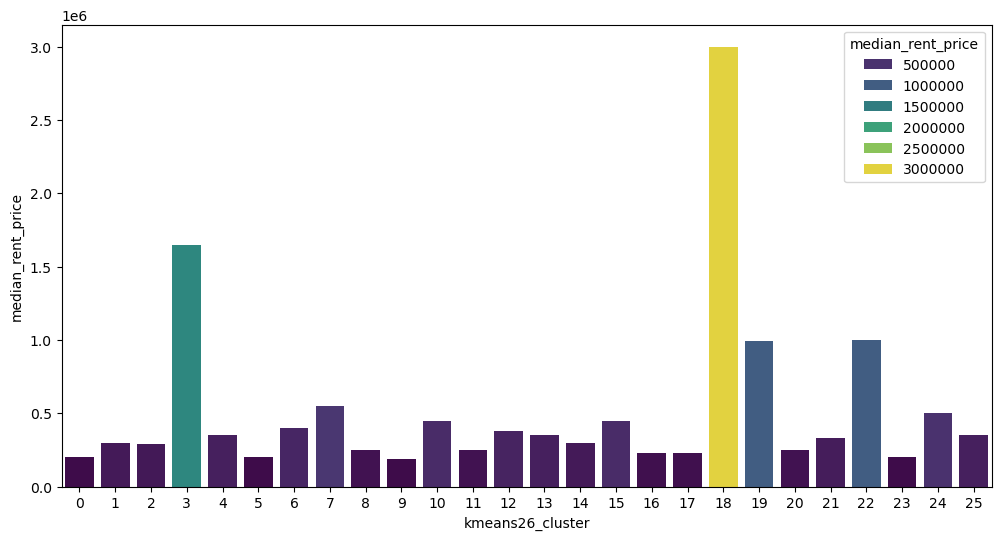

In [30]:
plt.figure(figsize=(12, 6))

sns.barplot( data = krisha_almaty_rental_ext_cluster_groupping,
             x = 'kmeans26_cluster',
             y = 'median_rent_price',
             hue = 'median_rent_price',
             palette = 'viridis' )


<Axes: xlabel='kmeans26_cluster', ylabel='mean_rent_price'>

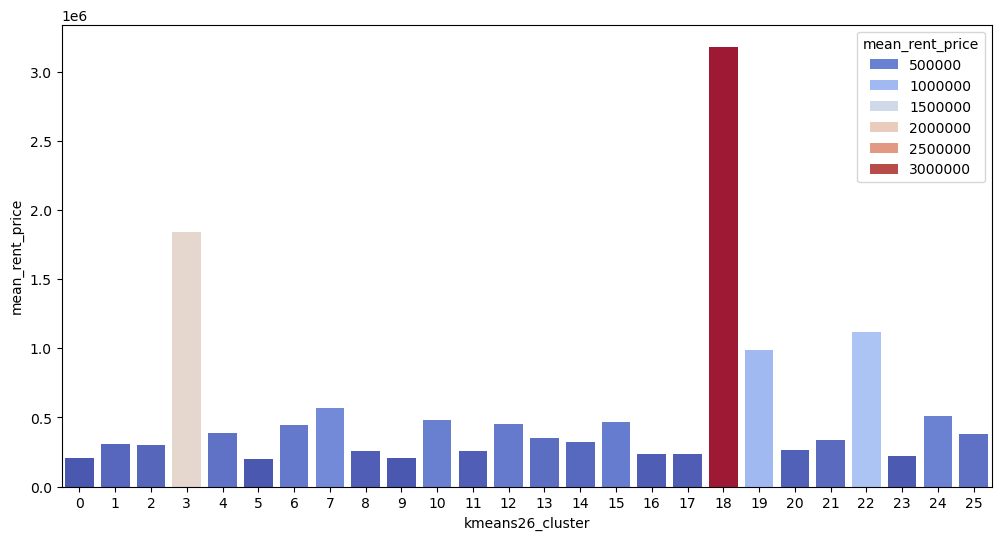

In [31]:
plt.figure(figsize=(12, 6))

sns.barplot( data = krisha_almaty_rental_ext_cluster_groupping,
             x = 'kmeans26_cluster',
             y = 'mean_rent_price',
             hue = 'mean_rent_price',
             palette = 'coolwarm' )

In [32]:
krisha_almaty_rental_ext_cluster_groupping

,kmeans26_cluster,mean_rent_price,median_rent_price,number_of_listings
0,0,208030.33,200000.00,1968
1,1,309758.27,300000.00,604
2,2,299781.90,290000.00,1539
3,3,1841229.51,1650000.00,122
4,4,388623.71,350000.00,194
5,5,198196.04,200000.00,1591
6,6,441962.92,400000.00,842
7,7,569605.14,550000.00,777
8,8,256333.33,250000.00,789
9,9,203271.42,190000.00,1452


In [33]:
mappings = {}

for column in ['bathroom', 'furniture', 'parking', 'security', 'full_address']:
    mapping = (krisha_almaty_rental_ext[[column, f'{column}_code']]
               .dropna()
               .drop_duplicates()
               .set_index(column)[f'{column}_code']
               .to_dict())
    mappings[column] = mapping


mappings

{'bathroom': {'разделен': 2,
  'совмещен': 5,
  'неизвестно': 1,
  'разделен, совмещен': 3,
  'совмещенный': 6,
  '2 с/у и более': 0,
  'раздельный': 4},
 'furniture': {'неизвестно': 34.0,
  'обеденный стол, шкаф для одежды, диван': 44.0,
  'кровать, обеденный стол, шкаф для одежды, кухонный гарнитур, рабочий стол, диван': 20.0,
  'кровать, обеденный стол, шкаф для одежды, кухонный гарнитур, рабочий стол': 19.0,
  'кровать, обеденный стол, шкаф для одежды, кухонный гарнитур, диван': 18.0,
  'обеденный стол, шкаф для одежды, кухонный гарнитур, диван': 46.0,
  'обеденный стол, шкаф для одежды, кухонный гарнитур, рабочий стол': 47.0,
  'обеденный стол, шкаф для одежды, кухонный гарнитур, рабочий стол, диван': 48.0,
  'кровать, шкаф для одежды, кухонный гарнитур, диван': 26.0,
  'кровать, шкаф для одежды, кухонный гарнитур, рабочий стол, диван': 28.0,
  'обеденный стол, кухонный гарнитур, рабочий стол': 39.0,
  'кровать, обеденный стол, шкаф для одежды, кухонный гарнитур': 17.0,
  'обеденн

## SAVE

In [34]:
from joblib import dump

dump(krisha_almaty_rental_kmeans26_pipeline,"krisha_almaty_rental_kmeans26_pipeline.joblib")

['krisha_almaty_rental_kmeans26_pipeline.joblib']

In [35]:
#### TEST LOADING

from joblib import load

krisha_almaty_rental_kmeans26_pipeline = load(r"C:\Users\User\Desktop\DATA SCIENCE\Github\krisha_bot\models\krisha_almaty_rental_kmeans26_pipeline.joblib")


In [36]:
krisha_almaty_rental_kmeans26_pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=7)),
                ('kmeans', KMeans(n_clusters=26, random_state=42))])

In [37]:
test_features_dict2 = {
    'floor': [4],
    'total_floors': [20],
    'area_sqm': [25],
    'rooms': [1],
    'price': [120000],
    'full_address_code' : [1],
    'furniture_code': [6] ,
    'parking_code': [1],
    'security_code': [10],
    'bathroom_code': [2]
}

In [38]:
krisha_almaty_rental_kmeans26_pipeline.predict(pd.DataFrame(test_features_dict2))

array([1])